<a href="https://colab.research.google.com/github/zahra-ziaei/teaching-python-undergrade/blob/main/Homework_1_(answers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

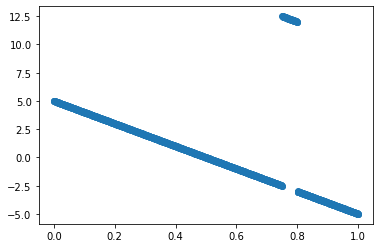

In [ ]:
plt.scatter(*generate_data())
# There are outliers near 0.8

# 2. Implement linear regression (2 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

Text(0, 0.5, 'Loss')

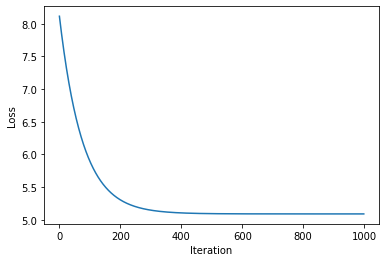

In [ ]:
weight = 1.
bias = 0.
def model(inputs):
    return weight * inputs + bias
def loss(inputs, targets):
    return np.mean(.5*(model(inputs) - targets)**2)
def dloss_dmodel(inputs, targets):
    return model(inputs) - targets
def weight_update(inputs, targets):
    return np.mean(inputs*dloss_dmodel(inputs, targets))
def bias_update(inputs, targets):
    return np.mean(dloss_dmodel(inputs, targets))

learning_rate = 0.1

losses = []
inputs, targets = generate_data()
for _ in range(1000):
    new_weight = weight - learning_rate*weight_update(inputs, targets)
    new_bias = bias - learning_rate*bias_update(inputs, targets)
    weight = new_weight
    bias = new_bias
    losses.append(loss(inputs, targets))

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


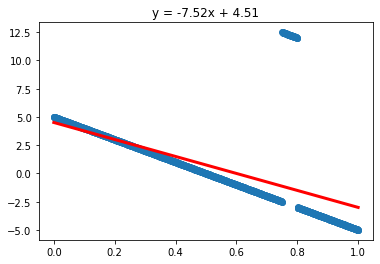

In [ ]:
plt.scatter(*generate_data())
plt.plot(np.linspace(0, 1, 100), weight*np.linspace(0, 1, 100) + bias, 'r', lw=3)
plt.title(f"y = {weight:.2f}x + {bias:.2f}");
# The outliers cause the line to drift away from the true values.

# 4. "Robust" linear regression (0.5 point)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

Text(0, 0.5, 'Loss')

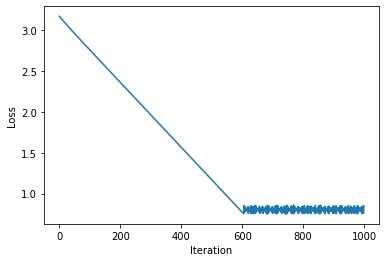

In [ ]:
weight = 1.
bias = 0.
def model(inputs):
    return weight * inputs + bias
def loss(inputs, targets):
    return np.mean(np.abs(model(inputs) - targets))
def dloss_dmodel(inputs, targets):
    return 2*np.greater(model(inputs) - targets, 0).astype(float) - 1
def weight_update(inputs, targets):
    return np.mean(inputs*dloss_dmodel(inputs, targets))
def bias_update(inputs, targets):
    return np.mean(dloss_dmodel(inputs, targets))

learning_rate = 0.1

losses = []
inputs, targets = generate_data()
for _ in range(1000):
    new_weight = weight - learning_rate*weight_update(inputs, targets)
    new_bias = bias - learning_rate*bias_update(inputs, targets)
    weight = new_weight
    bias = new_bias
    losses.append(loss(inputs, targets))

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

# The loss decreases linearly and fluctuates near the minimum.

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

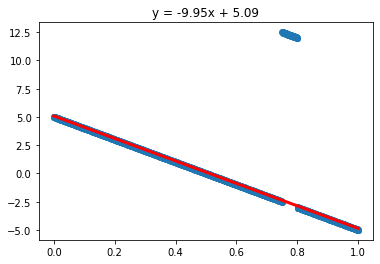

In [ ]:
plt.scatter(*generate_data())
plt.plot(np.linspace(0, 1, 100), weight*np.linspace(0, 1, 100) + bias, 'r', lw=3)
plt.title(f"y = {weight:.2f}x + {bias:.2f}");
# The L1 loss is more robust to outliers, see https://en.wikipedia.org/wiki/Robust_regression